In [1]:
from PIL import Image
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText

# ---- Settings ----
model_path = "PaddlePaddle/PaddleOCR-VL-1.5"
image_path = "/content/test.png"
task = "ocr" # Options: 'ocr' | 'table' | 'chart' | 'formula' | 'spotting' | 'seal'
# ------------------

# ---- Image Preprocessing For Spotting ----
image = Image.open(image_path).convert("RGB")
orig_w, orig_h = image.size
spotting_upscale_threshold = 1500

if task == "spotting" and orig_w < spotting_upscale_threshold and orig_h < spotting_upscale_threshold:

    process_w, process_h = orig_w * 2, orig_h * 2
    try:
        resample_filter = Image.Resampling.LANCZOS
    except AttributeError:
        resample_filter = Image.LANCZOS
    image = image.resize((process_w, process_h), resample_filter)

# Set max_pixels: use 1605632 for spotting, otherwise use default ~1M pixels
max_pixels = 2048 * 28 * 28 if task == "spotting" else 1280 * 28 * 28
# ---------------------------

# -------- Inference --------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
PROMPTS = {
    "ocr": "OCR:",
    "table": "Table Recognition:",
    "formula": "Formula Recognition:",
    "chart": "Chart Recognition:",
    "spotting": "Spotting:",
    "seal": "Seal Recognition:",
}

model = AutoModelForImageTextToText.from_pretrained(model_path, torch_dtype=torch.bfloat16).to(DEVICE).eval()
processor = AutoProcessor.from_pretrained(model_path)

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": PROMPTS[task]},
        ]
    }
]
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
    images_kwargs={"size": {"shortest_edge": processor.image_processor.min_pixels, "longest_edge": max_pixels}},
).to(model.device)

outputs = model.generate(**inputs, max_new_tokens=512)
result = processor.decode(outputs[0][inputs["input_ids"].shape[-1]:-1])
print(result)
# ---------------------------


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!
Unrecognized keys in `rope_parameters` for 'rope_type'='default': {'mrope_section'}


model.safetensors:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/608 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

The image processor of type `PaddleOCRVLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 
Unrecognized keys in `rope_parameters` for 'rope_type'='default': {'mrope_section'}


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.2M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Output
Probabilities

Softmax
↑
Linear
↑
Add & Norm
Feed
Forward
↑
Add & Norm
Multi-Head
Attention
Forward
↑
Add & Norm
Masked
Multi-Head
Attention
↑
Positional
Encoding
Input
Embedding
Output
Embedding

Inputs
Outputs
(shifted right)

Figure 1: The Transformer - model architecture.

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.


In [3]:
!pip install accelerate bitsandbytes sentence-transformers chromadb pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.0 MB/s eta 0:00:00


Đã tìm thấy Database cũ. Đang load lại...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


--- Đang tải model LLaVA-1.5 7B (4-bit) ---


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]


================ SẴN SÀNG HỎI ĐÁP ================
Nhập câu hỏi (gõ 'exit' để thoát): la net là gì

[Dữ liệu tìm được]:
- [text] elements. These qualitative ﬁndings highlight that the application of the RBA module in our network effectively
captures spatial details near the retinal vessel boundaries, facilitating the reﬁnement of segmentation results.
Due to the fact that the quantitative improvement of our method over the SOTA methods was not very
signiﬁcant, we conducted three consecutive rounds of training and testing on both the OCTA_3M and
OCTA_6M datasets to eliminate the inﬂuence of manual segmentation errors. The average results of LA-Net on
the two datasets are 92.74% and 89.39% DSC, respectively, while the LA-Net+ results are 93.03% and 89.70%. It
can be found that our average values are still superior to the SOTA methods, indicating that our improvement
was real and effective.
Our proposed LA-Net achieved satisfactory 3D-to-2D segmentation of retinal blood vessels. Moreover

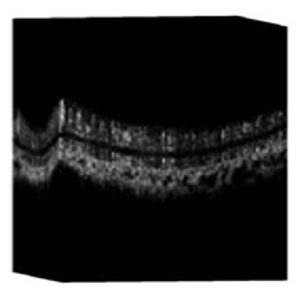

Nhập câu hỏi (gõ 'exit' để thoát): . The structure of reverse boundary attention module.

[Dữ liệu tìm được]:
- [text] Phys. Med. Biol. 69 (2024) 045019
https://doi.org/10.1088/1361-6560/ad2011
PAPER
LA-Net: layer attention network for 3D-to-2D retinal vessel
segmentation in OCTA images
Chaozhi Yang1
, Bei Li2, Qian Xiao1, Yun Bai1, Yachuan Li1, Zongmin Li1, Hongyi Li2 and Hua Li3
1 College of Computer Science and Technology, China University of Petroleum (East China), Qingdao 266580, Peopleʼs Republic of China
2 Beijing Hospital, Institute of Geriatric Medicine, Chinese Academy of Medical Science, Beijing 100730, Peopleʼs Republic of China
3 Key Laboratory of Intelligent Information Processing, Institute of Computing Technology, Chinese Academy of Sciences, Beijing 100190,
Peopleʼs Republic of China
E-mail: lizongmin@upc.edu.cn
Keywords: retinal vessel segmentation, 3D-to-2D, multi-scale layer attention, reverse boundary attention, OCTA volume
Abstract
Objective. Retinal vessel segmen

In [1]:
import os
import fitz  # PyMuPDF
from PIL import Image
import io
import torch
import gc
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
from sentence_transformers import SentenceTransformer
import chromadb
from langchain_core.documents import Document

# --- CẤU HÌNH ---
PDF_PATH = "/content/tai_lieu_mau.pdf"  # <--- UPLOAD FILE PDF VÀO COLAB RỒI SỬA TÊN TẠI ĐÂY
OUTPUT_IMG_DIR = "/content/extracted_images"
DB_DIR = "/content/chroma_db"

if not os.path.exists(OUTPUT_IMG_DIR):
    os.makedirs(OUTPUT_IMG_DIR)

# ==========================================
# PHẦN 1: XỬ LÝ PDF (Trích xuất Text & Ảnh)
# ==========================================
def process_pdf(pdf_path, img_output_dir):
    print(f"--- Đang xử lý file PDF: {pdf_path} ---")
    doc = fitz.open(pdf_path)

    text_chunks = []
    image_paths = []

    for page_index, page in enumerate(doc):
        # 1. Lấy text
        text = page.get_text()
        if text.strip():
            text_chunks.append({
                "page": page_index + 1,
                "content": text
            })

        # 2. Lấy ảnh
        image_list = page.get_images(full=True)
        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]

            # Lưu ảnh ra file
            image_filename = f"page{page_index+1}_img{img_index+1}.png"
            image_path = os.path.join(img_output_dir, image_filename)

            with open(image_path, "wb") as f:
                f.write(image_bytes)

            image_paths.append(image_path)

    print(f"-> Đã tìm thấy {len(text_chunks)} đoạn văn bản và {len(image_paths)} hình ảnh.")
    return text_chunks, image_paths

# ==========================================
# PHẦN 2: TẠO CAPTION & INDEXING (Dùng Model Nhẹ)
# ==========================================
def create_index_data(text_chunks, image_paths):
    docs = []

    # A. Index Text
    for chunk in text_chunks:
        docs.append(Document(
            page_content=chunk['content'],
            metadata={"source": f"Page {chunk['page']}", "type": "text"}
        ))

    # B. Index Ảnh (Dùng BLIP để tạo caption văn bản cho ảnh)
    print("--- Đang khởi tạo model BLIP để đọc nội dung ảnh (Captioning) ---")
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Model nhỏ gọn chuyên dùng để mô tả ảnh
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

    print("-> Đang tạo caption cho từng ảnh...")
    for img_path in image_paths:
        try:
            raw_image = Image.open(img_path).convert('RGB')
            # Prompt điều hướng model mô tả chi tiết
            inputs = processor(raw_image, "a photograph of", return_tensors="pt").to(device)
            out = model.generate(**inputs, max_new_tokens=50)
            caption = processor.decode(out[0], skip_special_tokens=True)

            # Lưu caption vào DB, nhưng metadata trỏ về ảnh gốc
            docs.append(Document(
                page_content=caption, # Chúng ta tìm kiếm dựa trên nội dung này
                metadata={"source": img_path, "type": "image"}
            ))
        except Exception as e:
            print(f"Lỗi đọc ảnh {img_path}: {e}")

    # Giải phóng VRAM sau khi dùng xong BLIP
    del model
    del processor
    torch.cuda.empty_cache()
    gc.collect()
    print("-> Đã giải phóng BLIP model.")

    return docs

def build_vector_db(docs):
    print("--- Đang lưu dữ liệu vào Vector DB ---")
    # Dùng model embedding nhẹ
    embedding_func = SentenceTransformer("all-MiniLM-L6-v2")

    # Wrapper cho ChromaDB
    class MyEmbedding:
        def embed_documents(self, texts):
            return embedding_func.encode(texts).tolist()
        def embed_query(self, text):
            return embedding_func.encode(text).tolist()

    chroma_client = chromadb.PersistentClient(path=DB_DIR)
    collection = chroma_client.get_or_create_collection(name="pdf_rag")

    ids = [str(i) for i in range(len(docs))]
    documents = [d.page_content for d in docs]
    metadatas = [d.metadata for d in docs]
    embeddings = MyEmbedding().embed_documents(documents)

    collection.add(ids=ids, documents=documents, embeddings=embeddings, metadatas=metadatas)
    print("-> Indexing hoàn tất!")
    return collection, MyEmbedding()

# ==========================================
# PHẦN 3: GENERATION (Dùng LLaVA 4-bit)
# ==========================================
# Đây là model chính để Chat, tải 4-bit để vừa với T4 GPU của Colab

def load_llava_model():
    print("--- Đang tải model LLaVA-1.5 7B (4-bit) ---")

    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16
    )

    model_id = "llava-hf/llava-1.5-7b-hf"
    processor = AutoProcessor.from_pretrained(model_id)
    model = LlavaForConditionalGeneration.from_pretrained(
        model_id,
        quantization_config=quantization_config,
        device_map="auto"
    )
    return model, processor

def generate_answer(query, collection, embedder, model, processor):
    # 1. Retrieve
    query_vec = embedder.embed_query(query)
    results = collection.query(query_embeddings=[query_vec], n_results=3)

    context_text = ""
    retrieved_image_path = None

    print("\n[Dữ liệu tìm được]:")
    for i in range(len(results['documents'][0])):
        meta = results['metadatas'][0][i]
        content = results['documents'][0][i]
        source_type = meta['type']
        print(f"- [{source_type}] {content} (Nguồn: {meta['source']})")

        if source_type == 'text':
            context_text += content + "\n"
        elif source_type == 'image' and retrieved_image_path is None:
            # Ưu tiên lấy hình ảnh đầu tiên tìm thấy
            retrieved_image_path = meta['source']

    # 2. Tạo Prompt
    # Format prompt đặc biệt của LLaVA
    prompt_text = f"USER: <image>\nDựa trên thông tin văn bản sau: {context_text}\nCâu hỏi: {query}\nHãy trả lời bằng tiếng Việt.\nASSISTANT:"

    # Nếu không tìm thấy ảnh trong DB, dùng ảnh trắng (dummy) để tránh lỗi model
    if retrieved_image_path:
        print(f"-> Đang sử dụng ảnh gốc để trả lời: {retrieved_image_path}")
        image = Image.open(retrieved_image_path)
    else:
        print("-> Không tìm thấy ảnh liên quan, chỉ dùng text.")
        prompt_text = prompt_text.replace("<image>", "") # Xóa token ảnh
        image = None
        # Nếu model bắt buộc cần ảnh, tạo ảnh đen nhỏ (tùy model, LLaVA 1.5 xử lý được text-only prompts tùy config, nhưng tốt nhất cứ đưa ảnh nếu prompt có token)
        # Ở đây ta xử lý đơn giản: nếu không có ảnh, dùng mode text-only của model nếu hỗ trợ, hoặc nhắc user.

    # 3. Generate
    if image:
        inputs = processor(text=prompt_text, images=image, return_tensors="pt").to("cuda")
    else:
        # Trường hợp chỉ có text (LLaVA đôi khi cần trick này hoặc dùng model khác,
        # nhưng để đơn giản ta vẫn pass inputs bình thường không có pixel_values)
        inputs = processor(text=f"USER: Dựa trên văn bản: {context_text}\nCâu hỏi: {query}\nASSISTANT:", images=None, return_tensors="pt").to("cuda")

    generate_ids = model.generate(**inputs, max_new_tokens=200)
    response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    # Cắt bỏ phần prompt, chỉ lấy phần trả lời sau ASSISTANT:
    final_answer = response.split("ASSISTANT:")[-1].strip()
    return final_answer, retrieved_image_path

# ==========================================
# MAIN EXECUTION FLOW
# ==========================================

# 1. Upload file PDF vào Files của Colab
if not os.path.exists(PDF_PATH):
    print(f"LỖI: Bạn chưa upload file PDF lên. Hãy upload và đổi tên thành {PDF_PATH}")
else:
    # Bước 1 & 2: Xử lý dữ liệu (Chỉ chạy 1 lần)
    if not os.path.exists(DB_DIR):
        txt_chunks, img_paths = process_pdf(PDF_PATH, OUTPUT_IMG_DIR)
        docs = create_index_data(txt_chunks, img_paths)
        collection, embedder = build_vector_db(docs)
    else:
        print("Đã tìm thấy Database cũ. Đang load lại...")
        chroma_client = chromadb.PersistentClient(path=DB_DIR)
        collection = chroma_client.get_collection(name="pdf_rag")
        embedding_func = SentenceTransformer("all-MiniLM-L6-v2")
        class MyEmbedding:
            def embed_documents(self, texts): return embedding_func.encode(texts).tolist()
            def embed_query(self, text): return embedding_func.encode(text).tolist()
        embedder = MyEmbedding()

    # Bước 3: Load Model Chat (Nặng)
    # Lưu ý: Nếu bị OOM (tràn RAM), hãy Restart Session và chỉ chạy từ đoạn Main Execution này (bỏ qua phần create_index_data)
    model, processor = load_llava_model()

    # Bước 4: Test
    print("\n================ SẴN SÀNG HỎI ĐÁP ================")
    while True:
        query = input("Nhập câu hỏi (gõ 'exit' để thoát): ")
        if query.lower() == 'exit': break

        answer, img = generate_answer(query, collection, embedder, model, processor)

        print("\n=== KẾT QUẢ ===")
        print(answer)
        if img:
            print(f"[Có hình ảnh minh họa đi kèm]: {img}")
            # Để hiện ảnh trên Colab:
            display(Image.open(img).resize((300, 300)))

--- Đang tải LLaVA-1.5 7B (4-bit) ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

--- Bắt đầu xử lý PDF: /content/tai_lieu_mau.pdf ---
MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

--- Đang tạo chú thích chi tiết (Dense Captioning) cho ảnh ---
(Quá trình này sẽ lâu hơn nhưng chính xác hơn nhiều)
 > Đã đọc ảnh p0_img0.png: The image features a logo for the Institute of Physics Engineering in Medicine (IPEM). The logo is p...
 > Đã đọc ảnh p0_img1.png: The image showcases a webinar presentation on the topic of radiation therapy. The presentation featu...
 > Đã đọc ảnh p1_img0.png: The image features a large blue circle, which is the main focus of the scene. The circle is position...
 > Đã đọc ảnh p2_img0.png: The image consists of two parts: a black and white photo of an eye, and a color photo of the same ey...
 > Đã đọc ảnh p4_img0.png: The image is a black and white photo of a waveform, likely representing a sound wave. The waveform i...
 > Đã đọc ảnh p4_img1.png: The image is a bl

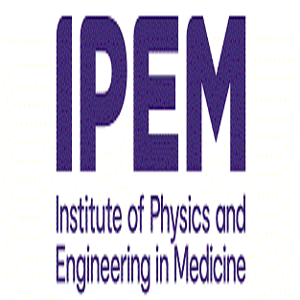


Nhập câu hỏi: OCTA 

[Tìm thấy thông tin]:
- [text] 3. Experiments and results
3.1. Dataset
We train and validate our LA-Net on the ...
- [text] Figure 5. Visual comparison of the segmentation results from different 3D-to-2D ...
- [image] The image displays a graph with several lines and numbers on it. The graph is la...
  -> Chọn ảnh minh họa: /content/extracted_images/p12_img0.png

=== TRẢ LỜI ===
OCTA là tên của một dự án nghiên cứu y tế, có nghĩa là "Optical Coherence Tomography-Angiography". Nó được sử dụng để đo lườm và các vấn đề khác liên quan đến mắt và vùng mắt. Dự án này được thành lập để phát triển các công cụ và phương pháp để đánh giá và chẩn đoán các vấn đề y tế liên quan đến mắt và vùng mắt.


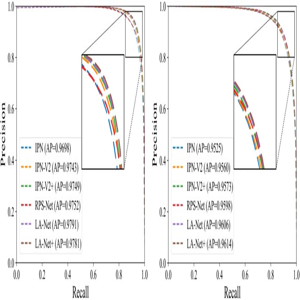


Nhập câu hỏi: precision recall

[Tìm thấy thông tin]:
- [text] accuracy (BACC), Dice similarity coefﬁcient (DSC), precision–recall (P–R) curve,...
- [text] 3. Experiments and results
3.1. Dataset
We train and validate our LA-Net on the ...
- [image] The image displays a graph with several lines and numbers on it. The graph is la...
  -> Chọn ảnh minh họa: /content/extracted_images/p12_img0.png

=== TRẢ LỜI ===
Precision (PRE) and recall (REC) are two important evaluation metrics used to assess the performance of a retinal vessel segmentation method. Precision measures the proportion of true positive samples in the predicted results, while recall measures the proportion of true positive samples among all positive samples. In general, a higher precision and recall value indicates better performance of the method.

Jaccard index (JAC) is another metric used to evaluate the similarity and diversity between sample sets. It measures the similarity between two sets by counting the number of 

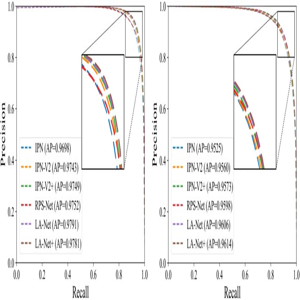

KeyboardInterrupt: Interrupted by user

In [1]:
import os
import fitz
from PIL import Image
import torch
import gc
from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer
import chromadb
from langchain_core.documents import Document

# Cấu hình
PDF_PATH = "/content/tai_lieu_mau.pdf"  # <--- Upload file PDF của bạn
IMG_DIR = "/content/extracted_images"
DB_DIR = "/content/chroma_dense_db"

if not os.path.exists(IMG_DIR): os.makedirs(IMG_DIR)

# ==========================================
# 1. LOAD MODEL LLaVA (Dùng chung cho cả Index và Chat)
# ==========================================
# Chúng ta load model ngay từ đầu và giữ trong RAM
def load_llava():
    print("--- Đang tải LLaVA-1.5 7B (4-bit) ---")
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16
    )
    processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")
    model = LlavaForConditionalGeneration.from_pretrained(
        "llava-hf/llava-1.5-7b-hf",
        quantization_config=bnb_config,
        device_map="auto"
    )
    return model, processor

# ==========================================
# 2. XỬ LÝ DỮ LIỆU & DENSE CAPTIONING
# ==========================================
def process_pdf_smart(pdf_path, img_output_dir, model, processor):
    doc = fitz.open(pdf_path)
    docs = []

    print(f"--- Bắt đầu xử lý PDF: {pdf_path} ---")

    # A. Xử lý Văn bản
    for page_idx, page in enumerate(doc):
        text = page.get_text()
        if len(text) > 50:
            docs.append(Document(page_content=text, metadata={"source": f"Page {page_idx}", "type": "text"}))

    # B. Xử lý Ảnh với DENSE CAPTIONING (Bí quyết nằm ở đây)
    print("--- Đang tạo chú thích chi tiết (Dense Captioning) cho ảnh ---")
    print("(Quá trình này sẽ lâu hơn nhưng chính xác hơn nhiều)")

    for page_idx, page in enumerate(doc):
        for img_idx, img in enumerate(page.get_images(full=True)):
            xref = img[0]
            base = doc.extract_image(xref)

            # Lưu ảnh
            filename = f"p{page_idx}_img{img_idx}.png"
            filepath = os.path.join(img_output_dir, filename)
            with open(filepath, "wb") as f:
                f.write(base["image"])

            # --- DENSE CAPTIONING ---
            # Dùng chính LLaVA để đọc kỹ bức ảnh
            try:
                raw_image = Image.open(filepath).convert('RGB')

                # Prompt yêu cầu mô tả kỹ lưỡng phục vụ tìm kiếm
                prompt_caption = "USER: <image>\nDescribe this image in great detail. Read all text, numbers, and explain charts or diagrams if present.\nASSISTANT:"

                inputs = processor(text=prompt_caption, images=raw_image, return_tensors="pt").to("cuda")
                out = model.generate(**inputs, max_new_tokens=150) # Cho phép tạo mô tả dài
                description = processor.decode(out[0], skip_special_tokens=True).split("ASSISTANT:")[-1].strip()

                print(f" > Đã đọc ảnh {filename}: {description[:100]}...")

                # Lưu mô tả vào Vector DB
                docs.append(Document(
                    page_content=description,  # Tìm kiếm dựa trên mô tả chi tiết này
                    metadata={"source": filepath, "type": "image"} # Vẫn trỏ về ảnh gốc
                ))
            except Exception as e:
                print(f"Lỗi xử lý ảnh {filename}: {e}")

    return docs

# ==========================================
# 3. LƯU VÀO VECTOR DB
# ==========================================
def index_data(docs):
    print("\n--- Đang lưu vào ChromaDB ---")
    embed_model = SentenceTransformer("all-MiniLM-L6-v2") # Model text embedding chuẩn

    client = chromadb.PersistentClient(path=DB_DIR)
    collection = client.get_or_create_collection("dense_rag")

    # Batch processing để tránh lỗi
    batch_size = 10
    for i in range(0, len(docs), batch_size):
        batch = docs[i:i+batch_size]
        collection.add(
            ids=[f"id_{i+j}" for j in range(len(batch))],
            documents=[d.page_content for d in batch],
            metadatas=[d.metadata for d in batch],
            embeddings=embed_model.encode([d.page_content for d in batch]).tolist()
        )
    return collection, embed_model

# ==========================================
# 4. CHAT FUNCTION
# ==========================================
def chat_dense_rag(query, collection, embed_model, llava_model, llava_processor):
    # 1. Retrieve
    query_vec = embed_model.encode(query).tolist()
    results = collection.query(query_embeddings=[query_vec], n_results=3)

    context = ""
    img_path = None

    print("\n[Tìm thấy thông tin]:")
    for i, txt in enumerate(results['documents'][0]):
        meta = results['metadatas'][0][i]
        print(f"- [{meta['type']}] {txt[:80]}...")
        if meta['type'] == 'text':
            context += txt + "\n"
        elif meta['type'] == 'image' and img_path is None:
            img_path = meta['source']
            print(f"  -> Chọn ảnh minh họa: {img_path}")

    # 2. Generate
    prompt = f"USER: <image>\nDựa trên ngữ cảnh và hình ảnh:\n{context}\nCâu hỏi: {query}\nTrả lời chi tiết bằng tiếng Việt.\nASSISTANT:"

    image_input = Image.open(img_path) if img_path else None
    if not image_input:
        prompt = prompt.replace("<image>", "")

    inputs = llava_processor(text=prompt, images=image_input, return_tensors="pt").to("cuda")
    out = llava_model.generate(**inputs, max_new_tokens=300)
    return llava_processor.decode(out[0], skip_special_tokens=True).split("ASSISTANT:")[-1].strip(), img_path

# ==========================================
# MAIN EXECUTION
# ==========================================
if __name__ == "__main__":
    # 1. Load Model LLaVA (Chỉ load 1 lần duy nhất)
    model, processor = load_llava()

    # 2. Kiểm tra dữ liệu
    if not os.path.exists(PDF_PATH):
        print("Hãy upload file PDF!")
    else:
        # Nếu chưa index thì làm, có rồi thì load
        if not os.path.exists(DB_DIR):
            docs = process_pdf_smart(PDF_PATH, IMG_DIR, model, processor)
            collection, embedder = index_data(docs)
        else:
            print("Đã có Database, loading...")
            client = chromadb.PersistentClient(path=DB_DIR)
            collection = client.get_collection("dense_rag")
            embedder = SentenceTransformer("all-MiniLM-L6-v2")

        # 3. Chat
        while True:
            q = input("\nNhập câu hỏi: ")
            if q == "exit": break
            ans, img = chat_dense_rag(q, collection, embedder, model, processor)
            print("\n=== TRẢ LỜI ===")
            print(ans)
            if img: display(Image.open(img).resize((300,300)))

In [3]:
!pip install "unstructured[all-docs]" picture_models py-tesseract layoutparser
!pip install docling
# Cài thêm poppler và tesseract vào hệ thống (Ubuntu: sudo apt-get install poppler-utils tesseract-ocr)
!pip install -U transformers accelerate docling pymupdf pillow qwen-vl-utils bitsandbytes accelerate

ERROR: Could not find a version that satisfies the requirement picture_models (from versions: none)
ERROR: No matching distribution found for picture_models
  Using cached transformers-5.0.0-py3-none-any.whl.metadata (37 kB)
  Using cached pillow-12.1.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached huggingface_hub-1.3.7-py3-none-any.whl.metadata (13 kB)
INFO: pip is looking at multiple versions of docling to determine which version is compatible with other requirements. This could take a while.
  Using cached docling-2.72.0-py3-none-any.whl.metadata (11 kB)
  Using cached docling-2.71.0-py3-none-any.whl.metadata (11 kB)
  Using cached docling-2.70.0-py3-none-any.whl.metadata (11 kB)
  Using cached docling-2.69.1-py3-none-any.whl.metadata (11 kB)
INFO: pip is still looking at multiple versions of docling to determine which version is compatible with other requirements. This could take a while.
  Using cached docling-2.69.0-py3-none-any.whl.

In [6]:
import os
import fitz
import torch
import gc
from pathlib import Path
from PIL import Image
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor, BitsAndBytesConfig
from docling.document_converter import DocumentConverter

# --- 1. CONFIGURATION ---
model_id = "Qwen/Qwen2.5-VL-3B-Instruct" # Or Qwen/Qwen2.5-VL-7B-Instruct
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"--- Loading {model_id} with Qwen3-style processor logic ---")

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=quantization_config,
    device_map="auto",
    trust_remote_code=True
)

processor = AutoProcessor.from_pretrained(model_id)

def describe_image_with_qwen(image_path):
    torch.cuda.empty_cache()
    gc.collect()

    try:
        raw_image = Image.open(image_path).convert("RGB")

        # Following your example's exact structure
        messages = [{
            "role": "user",
            "content": [
                {"type": "image", "image": raw_image},
                {"type": "text", "text": "Hãy quan sát kỹ hình ảnh này. Mô tả chi tiết nội dung, bao gồm văn bản và bảng biểu nếu có bằng tiếng Việt."}
            ],
        }]

        # 1. Preparation for inference (APPLYING YOUR EXAMPLE LOGIC)
        inputs = processor.apply_chat_template(
            messages,
            tokenize=True,
            add_generation_prompt=True,
            return_dict=True,
            return_tensors="pt"
        ).to(device)

        # 2. Inference: Generation of the output
        with torch.no_grad():
            generated_ids = model.generate(
                **inputs,
                max_new_tokens=1024,
                do_sample=False,
                temperature=0.0
            )

        # 3. Trimming and Decoding
        generated_ids_trimmed = [
            out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
        ]
        response = processor.batch_decode(
            generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
        )

        return response[0].strip()

    except Exception as e:
        return f"AI Error: {str(e)}"
    finally:
        if 'raw_image' in locals(): del raw_image
        torch.cuda.empty_cache()

# --- 2. MULTIMODAL PDF PROCESSING ---
def process_pdf_full_multimodal(file_path):
    output_dir = Path("output_data")
    image_dir = output_dir / "images"
    output_dir.mkdir(parents=True, exist_ok=True)
    image_dir.mkdir(parents=True, exist_ok=True)

    # Text extraction via Docling
    print("--- 1. Docling: Converting Text & Tables ---")
    converter = DocumentConverter()
    result = converter.convert(file_path)
    markdown_content = result.document.export_to_markdown()

    # Image extraction/rendering via PyMuPDF
    print("--- 2. PyMuPDF: Processing Pages & AI Analysis ---")
    doc = fitz.open(file_path)
    image_descriptions = []

    for page_index in range(len(doc)):
        page = doc[page_index]

        # Rendering page as high-res image to ensure AI can see all charts/context
        zoom = 2.0
        mat = fitz.Matrix(zoom, zoom)
        pix = page.get_pixmap(matrix=mat)

        img_filename = f"page_{page_index+1}.png"
        img_path = image_dir / img_filename
        pix.save(str(img_path))

        print(f"   [*] Đang phân tích Trang {page_index+1}...")
        desc = describe_image_with_qwen(img_path)

        image_descriptions.append(f"\n### Phân tích Trang {page_index+1}\n{desc}\n")

    # Final Save
    final_output = f"# DỮ LIỆU RAG ĐA PHƯƠNG THỨC\n\n## NỘI DUNG VĂN BẢN\n{markdown_content}\n\n## PHÂN TÍCH HÌNH ẢNH CHI TIẾT\n" + "\n".join(image_descriptions)
    with open(output_dir / "final_report.md", "w", encoding="utf-8") as f:
        f.write(final_output)

    print(f"\n--- XONG! Kết quả lưu tại: {output_dir}/final_report.md ---")

if __name__ == "__main__":
    PDF_FILE = "tai_lieu_mau.pdf"
    if os.path.exists(PDF_FILE):
        process_pdf_full_multimodal(PDF_FILE)
    else:
        print(f"Lỗi: Không tìm thấy file {PDF_FILE}")

--- Loading Qwen/Qwen2.5-VL-3B-Instruct with Qwen3-style processor logic ---


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO] 2026-02-03 21:40:07,527 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2026-02-03 21:40:07,550 [RapidOCR] download_file.py:60: File exists and is valid: /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_det_infer.onnx
[INFO] 2026-02-03 21:40:07,551 [RapidOCR] main.py:53: Using /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_det_infer.onnx
[INFO] 2026-02-03 21:40:07,650 [RapidOCR] base.py:22: Using engine_name: onnxruntime


--- 1. Docling: Converting Text & Tables ---


[INFO] 2026-02-03 21:40:07,658 [RapidOCR] download_file.py:60: File exists and is valid: /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_ppocr_mobile_v2.0_cls_infer.onnx
[INFO] 2026-02-03 21:40:07,659 [RapidOCR] main.py:53: Using /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_ppocr_mobile_v2.0_cls_infer.onnx
[INFO] 2026-02-03 21:40:07,701 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2026-02-03 21:40:07,752 [RapidOCR] download_file.py:60: File exists and is valid: /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_rec_infer.onnx
[INFO] 2026-02-03 21:40:07,752 [RapidOCR] main.py:53: Using /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_rec_infer.onnx
[WARNING] 2026-02-03 21:40:22,815 [RapidOCR] main.py:125: The text detection result is empty
[WARNING] 2026-02-03 21:40:25,415 [RapidOCR] main.py:125: The text detection result is empty
[WARNING] 2026-02-03 21:40:34,283 [RapidOCR] main.py:125: The text detection resu

--- 2. PyMuPDF: Processing Pages & AI Analysis ---
   [*] Đang phân tích Trang 1...
   [*] Đang phân tích Trang 2...
   [*] Đang phân tích Trang 3...
   [*] Đang phân tích Trang 4...
   [*] Đang phân tích Trang 5...
   [*] Đang phân tích Trang 6...
   [*] Đang phân tích Trang 7...
   [*] Đang phân tích Trang 8...
   [*] Đang phân tích Trang 9...
   [*] Đang phân tích Trang 10...
   [*] Đang phân tích Trang 11...
   [*] Đang phân tích Trang 12...
MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

   [*] Đang phân tích Trang 13...
   [*] Đang phân tích Trang 14...
MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

   [*] Đang phân tích Trang 15...
   [*] Đang phân tích Trang 16...

--- XONG! Kết quả lưu tại: output_data/final_report.md ---


In [7]:
import os
import fitz
import torch
import gc
from pathlib import Path
from PIL import Image
from transformers import Qwen3VLForConditionalGeneration, AutoProcessor, BitsAndBytesConfig
from docling.document_converter import DocumentConverter

# --- 1. CẤU HÌNH MODEL ---
model_id = "Qwen/Qwen3-VL-2B-Instruct"
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"--- Đang tải {model_id} ---")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

model = Qwen3VLForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)
processor = AutoProcessor.from_pretrained(model_id)

def describe_specific_image(image_path):
    torch.cuda.empty_cache()
    gc.collect()
    try:
        raw_image = Image.open(image_path).convert("RGB")
        messages = [{
            "role": "user",
            "content": [
                {"type": "image", "image": raw_image},
                {"type": "text", "text": "Mô tả nội dung hình ảnh này một cách chi tiết bằng tiếng Việt. Nếu có văn bản trong ảnh, hãy trích xuất nó."}
            ],
        }]

        inputs = processor.apply_chat_template(
            messages,
            tokenize=True,
            add_generation_prompt=True,
            return_dict=True,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            generated_ids = model.generate(**inputs, max_new_tokens=512, do_sample=False)

        generated_ids_trimmed = [
            out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
        ]
        response = processor.batch_decode(
            generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
        )
        return response[0].strip()
    except Exception as e:
        return f"Lỗi AI: {str(e)}"
    finally:
        torch.cuda.empty_cache()

# --- 2. XỬ LÝ PDF ---
def process_pdf_multimodal(file_path):
    output_dir = Path("output_data")
    image_dir = output_dir / "extracted_images"
    output_dir.mkdir(parents=True, exist_ok=True)
    image_dir.mkdir(parents=True, exist_ok=True)

    # A. Dùng Docling lấy nội dung văn bản & bảng
    print("--- 1. Docling: Đang chuyển đổi văn bản và bảng biểu ---")
    converter = DocumentConverter()
    result = converter.convert(file_path)
    markdown_content = result.document.export_to_markdown()

    # B. Dùng PyMuPDF chỉ trích xuất đúng các object hình ảnh
    print("--- 2. Qwen3-VL: Đang phân tích từng hình ảnh riêng lẻ ---")
    doc = fitz.open(file_path)
    image_descriptions = []
    img_counter = 0

    for page_index in range(len(doc)):
        page = doc[page_index]
        image_list = page.get_images(full=True)

        for img_info in image_list:
            xref = img_info[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]

            # Lọc bỏ ảnh quá nhỏ (logo, icon, vạch kẻ)
            if base_image["width"] < 100 or base_image["height"] < 100:
                continue

            img_counter += 1
            img_filename = f"image_p{page_index+1}_{img_counter}.png"
            img_path = image_dir / img_filename

            with open(img_path, "wb") as f:
                f.write(image_bytes)

            print(f"   [*] Phân tích ảnh {img_counter} (Trang {page_index+1})...")
            desc = describe_specific_image(img_path)
            image_descriptions.append(f"\n### Hình ảnh {img_counter} (Trang {page_index+1}):\n{desc}\n")

    # Gộp kết quả
    final_output = f"# KẾT QUẢ PHÂN TÍCH\n\n## 1. VĂN BẢN & BẢNG (DOCLING)\n{markdown_content}\n\n## 2. MÔ TẢ HÌNH ẢNH (QWEN3-VL)\n" + "\n".join(image_descriptions)

    with open(output_dir / "final_report.md", "w", encoding="utf-8") as f:
        f.write(final_output)

    print(f"\n--- HOÀN TẤT ---")
    print(f"Tổng số ảnh đã trích xuất và mô tả: {img_counter}")

if __name__ == "__main__":
    PDF_FILE = "tai_lieu_mau.pdf"
    if os.path.exists(PDF_FILE):
        process_pdf_multimodal(PDF_FILE)
    else:
        print(f"Không tìm thấy file {PDF_FILE}")

--- Đang tải Qwen/Qwen3-VL-2B-Instruct ---


[INFO] 2026-02-03 22:04:55,137 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2026-02-03 22:04:55,154 [RapidOCR] download_file.py:60: File exists and is valid: /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_det_infer.onnx
[INFO] 2026-02-03 22:04:55,154 [RapidOCR] main.py:53: Using /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_det_infer.onnx
[INFO] 2026-02-03 22:04:55,257 [RapidOCR] base.py:22: Using engine_name: onnxruntime


--- 1. Docling: Đang chuyển đổi văn bản và bảng biểu ---


[INFO] 2026-02-03 22:04:55,262 [RapidOCR] download_file.py:60: File exists and is valid: /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_ppocr_mobile_v2.0_cls_infer.onnx
[INFO] 2026-02-03 22:04:55,263 [RapidOCR] main.py:53: Using /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_ppocr_mobile_v2.0_cls_infer.onnx
[INFO] 2026-02-03 22:04:55,313 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2026-02-03 22:04:55,343 [RapidOCR] download_file.py:60: File exists and is valid: /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_rec_infer.onnx
[INFO] 2026-02-03 22:04:55,344 [RapidOCR] main.py:53: Using /usr/local/lib/python3.12/dist-packages/rapidocr/models/ch_PP-OCRv4_rec_infer.onnx
[WARNING] 2026-02-03 22:05:09,383 [RapidOCR] main.py:125: The text detection result is empty
[WARNING] 2026-02-03 22:05:11,910 [RapidOCR] main.py:125: The text detection result is empty
[WARNING] 2026-02-03 22:05:20,371 [RapidOCR] main.py:125: The text detection resu

--- 2. Qwen3-VL: Đang phân tích từng hình ảnh riêng lẻ ---
   [*] Phân tích ảnh 1 (Trang 1)...


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


   [*] Phân tích ảnh 2 (Trang 1)...
   [*] Phân tích ảnh 3 (Trang 3)...
   [*] Phân tích ảnh 4 (Trang 5)...
   [*] Phân tích ảnh 5 (Trang 5)...
   [*] Phân tích ảnh 6 (Trang 10)...
   [*] Phân tích ảnh 7 (Trang 11)...
   [*] Phân tích ảnh 8 (Trang 12)...
   [*] Phân tích ảnh 9 (Trang 13)...
   [*] Phân tích ảnh 10 (Trang 13)...
   [*] Phân tích ảnh 11 (Trang 14)...
   [*] Phân tích ảnh 12 (Trang 14)...

--- HOÀN TẤT ---
Tổng số ảnh đã trích xuất và mô tả: 12


In [8]:
pip install -U langchain-text-splitters langchain-huggingface langchain-community langchain faiss-cpu sentence-transformers

  Using cached langchain_text_splitters-1.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.8/495.8 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.7
    Uninstalling langchain-core-1.2.7

In [3]:
import os
import torch
import gc
from pathlib import Path

# ==============================
# IMPORT ĐÚNG CHUẨN LANGCHAIN MỚI
# ==============================
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.documents import Document


# ==============================
# 3. HỆ THỐNG RAG
# ==============================
def build_rag_system(report_path, index_name="faiss_index"):
    """
    Xây dựng hệ thống Vector Database từ file Markdown.
    """
    print("\n--- 3. Đang xây dựng hệ thống RAG ---")

    report_path = Path(report_path)

    if not report_path.exists():
        print(f"Lỗi: Không tìm thấy file báo cáo tại {report_path}")
        return None

    try:
        # 1. Đọc file Markdown
        content = report_path.read_text(encoding="utf-8")

        # 2. Chunking (tối ưu cho Markdown + ảnh mô tả)
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,
            chunk_overlap=150,
            separators=["\n### ", "\n## ", "\n\n", "\n", " ", ""]
        )

        chunks = text_splitter.split_text(content)
        documents = [
            Document(page_content=chunk, metadata={"source": str(report_path)})
            for chunk in chunks
        ]

        print(f"Đã chia văn bản thành {len(documents)} chunks.")

        # 3. Embedding model (đa ngôn ngữ – tốt cho tiếng Việt)
        device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Đang tải Embedding model trên {device}...")

        embeddings = HuggingFaceEmbeddings(
            model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
            model_kwargs={"device": device}
        )

        # 4. Tạo FAISS Vector Store
        print("Đang tạo FAISS Vector Database...")
        vector_db = FAISS.from_documents(documents, embeddings)

        # 5. Lưu index
        vector_db.save_local(index_name)
        print(f"✅ RAG sẵn sàng! Index lưu tại: {index_name}")

        return vector_db

    except Exception as e:
        print(f"❌ Lỗi khi xây dựng RAG: {e}")
        return None

    finally:
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()


# ==============================
# TRUY VẤN
# ==============================
def ask_question(vector_db, query, k=3):
    """
    Similarity Search
    """
    if vector_db is None:
        print("❌ Vector DB chưa được khởi tạo.")
        return []

    docs = vector_db.similarity_search(query, k=k)

    print(f"\n[Câu hỏi]: {query}")
    print("-" * 60)

    if not docs:
        print("Không tìm thấy thông tin phù hợp.")
    else:
        for i, doc in enumerate(docs, 1):
            print(f"--- Kết quả {i} ---")
            print(doc.page_content.strip())
            print("-" * 60)

    return docs


# ==============================
# MAIN
# ==============================
if __name__ == "__main__":
    REPORT_FILE = "output_data/final_report.md"

    if os.path.exists(REPORT_FILE):
        db = build_rag_system(REPORT_FILE)

        if db:
            print("\n" + "=" * 20 + " THỬ NGHIỆM TRUY VẤN " + "=" * 20)

            ask_question(db, "Nội dung hình ảnh ở trang đầu tiên là gì?")
            ask_question(db, "Tóm tắt các thông số kỹ thuật chính trong tài liệu.")
    else:
        print(f"⚠️ Chưa có file {REPORT_FILE}. Hãy chạy bước trích xuất PDF trước.")



--- 3. Đang xây dựng hệ thống RAG ---
Đã chia văn bản thành 115 chunks.
Đang tải Embedding model trên cuda...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/526 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Đang tạo FAISS Vector Database...
✅ RAG sẵn sàng! Index lưu tại: faiss_index

==================== THỬ NGHIỆM TRUY VẤN ====================

[Câu hỏi]: Nội dung hình ảnh ở trang đầu tiên là gì?
------------------------------------------------------------
--- Kết quả 1 ---
### Hình ảnh 12 (Trang 14):
Hình ảnh này gồm bốn ô hình ảnh, mỗi ô là một hình ảnh khác nhau, được sắp xếp thành một bảng 2x2.
------------------------------------------------------------
--- Kết quả 2 ---
### Hình ảnh 11 (Trang 14):
Hình ảnh này gồm mười ô hình ảnh được chia thành hai hàng: hàng trên có năm ô, hàng dưới có năm ô. Mỗi ô hình ảnh đều là một hình ảnh đen trắng, có dạng hình tròn hoặc hình chữ nhật, với các đường nét trắng chạy dọc theo các đường cong, tạo thành một mạng lưới phức tạp.

- Hàng trên: Các hình ảnh có màu trắng và đen, có thể là các hình ảnh chụp từ một thiết bị như kính lúp hoặc máy ảnh, với các đường nét trắng chạy dọc theo các đường cong, tạo thành một mạng lưới phức tạp.
- Hàng dưới: Cá

In [4]:
import os
import torch
import gc
from pathlib import Path

# ==============================
# IMPORT ĐÚNG CHUẨN LANGCHAIN MỚI (FIXED)
# ==============================
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
# Sửa lỗi tại đây: Document nằm trong langchain_core
from langchain_core.documents import Document


# ==============================
# 3. HỆ THỐNG RAG
# ==============================
def build_rag_system(report_path, index_name="faiss_index"):
    """
    Xây dựng hệ thống Vector Database từ file Markdown.
    """
    print("\n--- 3. Đang xây dựng hệ thống RAG ---")

    report_path = Path(report_path)

    if not report_path.exists():
        print(f"❌ Lỗi: Không tìm thấy file báo cáo tại {report_path}")
        return None

    try:
        # 1. Đọc file Markdown
        content = report_path.read_text(encoding="utf-8")

        # 2. Chunking (tối ưu cho Markdown + ảnh mô tả)
        # Sử dụng các separators đặc thù để không cắt nát phần mô tả ảnh AI
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,
            chunk_overlap=150,
            separators=["\n### ", "\n## ", "\n\n", "\n", " ", ""]
        )

        chunks = text_splitter.split_text(content)
        documents = [
            Document(page_content=chunk, metadata={"source": str(report_path)})
            for chunk in chunks
        ]

        print(f"✅ Đã chia văn bản thành {len(documents)} chunks.")

        # 3. Embedding model (đa ngôn ngữ – tốt cho tiếng Việt)
        device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"⚙️ Đang tải Embedding model trên {device}...")

        # Sử dụng mô hình xử lý đa ngôn ngữ của Sentence Transformers
        embeddings = HuggingFaceEmbeddings(
            model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
            model_kwargs={"device": device}
        )

        # 4. Tạo FAISS Vector Store
        print("📊 Đang tạo FAISS Vector Database...")
        vector_db = FAISS.from_documents(documents, embeddings)

        # 5. Lưu index cục bộ để tái sử dụng
        vector_db.save_local(index_name)
        print(f"🚀 RAG sẵn sàng! Index lưu tại: {index_name}")

        return vector_db

    except Exception as e:
        print(f"❌ Lỗi khi xây dựng RAG: {e}")
        return None

    finally:
        # Dọn dẹp bộ nhớ RAM/VRAM
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()


# ==============================
# TRUY VẤN
# ==============================
def ask_question(vector_db, query, k=3):
    """
    Thực hiện Similarity Search (Tìm kiếm tương đồng)
    """
    if vector_db is None:
        print("❌ Vector DB chưa được khởi tạo.")
        return []

    # Tìm k đoạn văn bản có vector gần nhất với câu hỏi
    docs = vector_db.similarity_search(query, k=k)

    print(f"\n🔍 [Câu hỏi]: {query}")
    print("-" * 60)

    if not docs:
        print("⚠️ Không tìm thấy thông tin phù hợp.")
    else:
        for i, doc in enumerate(docs, 1):
            print(f"--- Kết quả {i} ---")
            print(doc.page_content.strip())
            print("-" * 60)

    return docs


# ==============================
# CHƯƠNG TRÌNH CHÍNH
# ==============================
if __name__ == "__main__":
    # File này phải được tạo ra từ bước phân tích PDF bằng Qwen3-VL/Docling trước đó
    REPORT_FILE = "output_data/final_report.md"

    if os.path.exists(REPORT_FILE):
        db = build_rag_system(REPORT_FILE)

        if db:
            print("\n" + "=" * 20 + " THỬ NGHIỆM TRUY VẤN " + "=" * 20)

            # Truy vấn thử thông tin ảnh (Dữ liệu do Qwen mô tả)
            ask_question(db, "Hình ảnh ở trang 1 nói về nội dung gì?")

            # Truy vấn thử thông tin văn bản (Dữ liệu do Docling trích xuất)
            ask_question(db, "Tóm tắt các thông số kỹ thuật chính trong tài liệu.")
    else:
        print(f"⚠️ Chưa có file {REPORT_FILE}. Hãy đảm bảo bạn đã chạy code trích xuất PDF.")


--- 3. Đang xây dựng hệ thống RAG ---
✅ Đã chia văn bản thành 115 chunks.
⚙️ Đang tải Embedding model trên cuda...
📊 Đang tạo FAISS Vector Database...
🚀 RAG sẵn sàng! Index lưu tại: faiss_index

==================== THỬ NGHIỆM TRUY VẤN ====================

🔍 [Câu hỏi]: Hình ảnh ở trang 1 nói về nội dung gì?
------------------------------------------------------------
--- Kết quả 1 ---
### Hình ảnh 12 (Trang 14):
Hình ảnh này gồm bốn ô hình ảnh, mỗi ô là một hình ảnh khác nhau, được sắp xếp thành một bảng 2x2.
------------------------------------------------------------
--- Kết quả 2 ---
### Hình ảnh 11 (Trang 14):
Hình ảnh này gồm mười ô hình ảnh được chia thành hai hàng: hàng trên có năm ô, hàng dưới có năm ô. Mỗi ô hình ảnh đều là một hình ảnh đen trắng, có dạng hình tròn hoặc hình chữ nhật, với các đường nét trắng chạy dọc theo các đường cong, tạo thành một mạng lưới phức tạp.

- Hàng trên: Các hình ảnh có màu trắng và đen, có thể là các hình ảnh chụp từ một thiết bị như kính lúp 

# Multimodal RAG


In [6]:
!pip install pytesseract

🔹 Loading embedding model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


🔹 Loading LLM from HuggingFace...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

📄 Extracting PDF...
MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

MuPDF error: syntax error: cannot find ExtGState resource 'FXE1'

📦 Building FAISS index...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

✅ Multimodal RAG ready (TEXT + IMAGE)

❓ Question (Enter để thoát): lanet


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



🤖 Answer:
 The context does not contain any direct information about "LANet" or "LANet". However, it does describe an architecture called "LA-Net" on Page 7, which is for 3D-to-2D retinal vessel segmentation. The architecture is illustrated in Figure 2. There is no mention of "LANet" in the provided context.

If you meant to ask about "LA-Net", here's what was found:

LA-Net is described as a proposed architecture for 3D-to-2D retinal vessel segmentation. It includes a 3D projection path and a 2D residual convolution block path. The 3D path is emphasized for effective feature extraction before downscaling to 2D, and a multi-scale layer attention (MSLA) module is introduced to enhance the extraction of 3D vascular features across different receptive fields while improving horizontal direction recognition. The architecture is shown in Figure 2. 

For more detailed information, please refer to the context provided. If you need further clarification or have another question, feel free to 

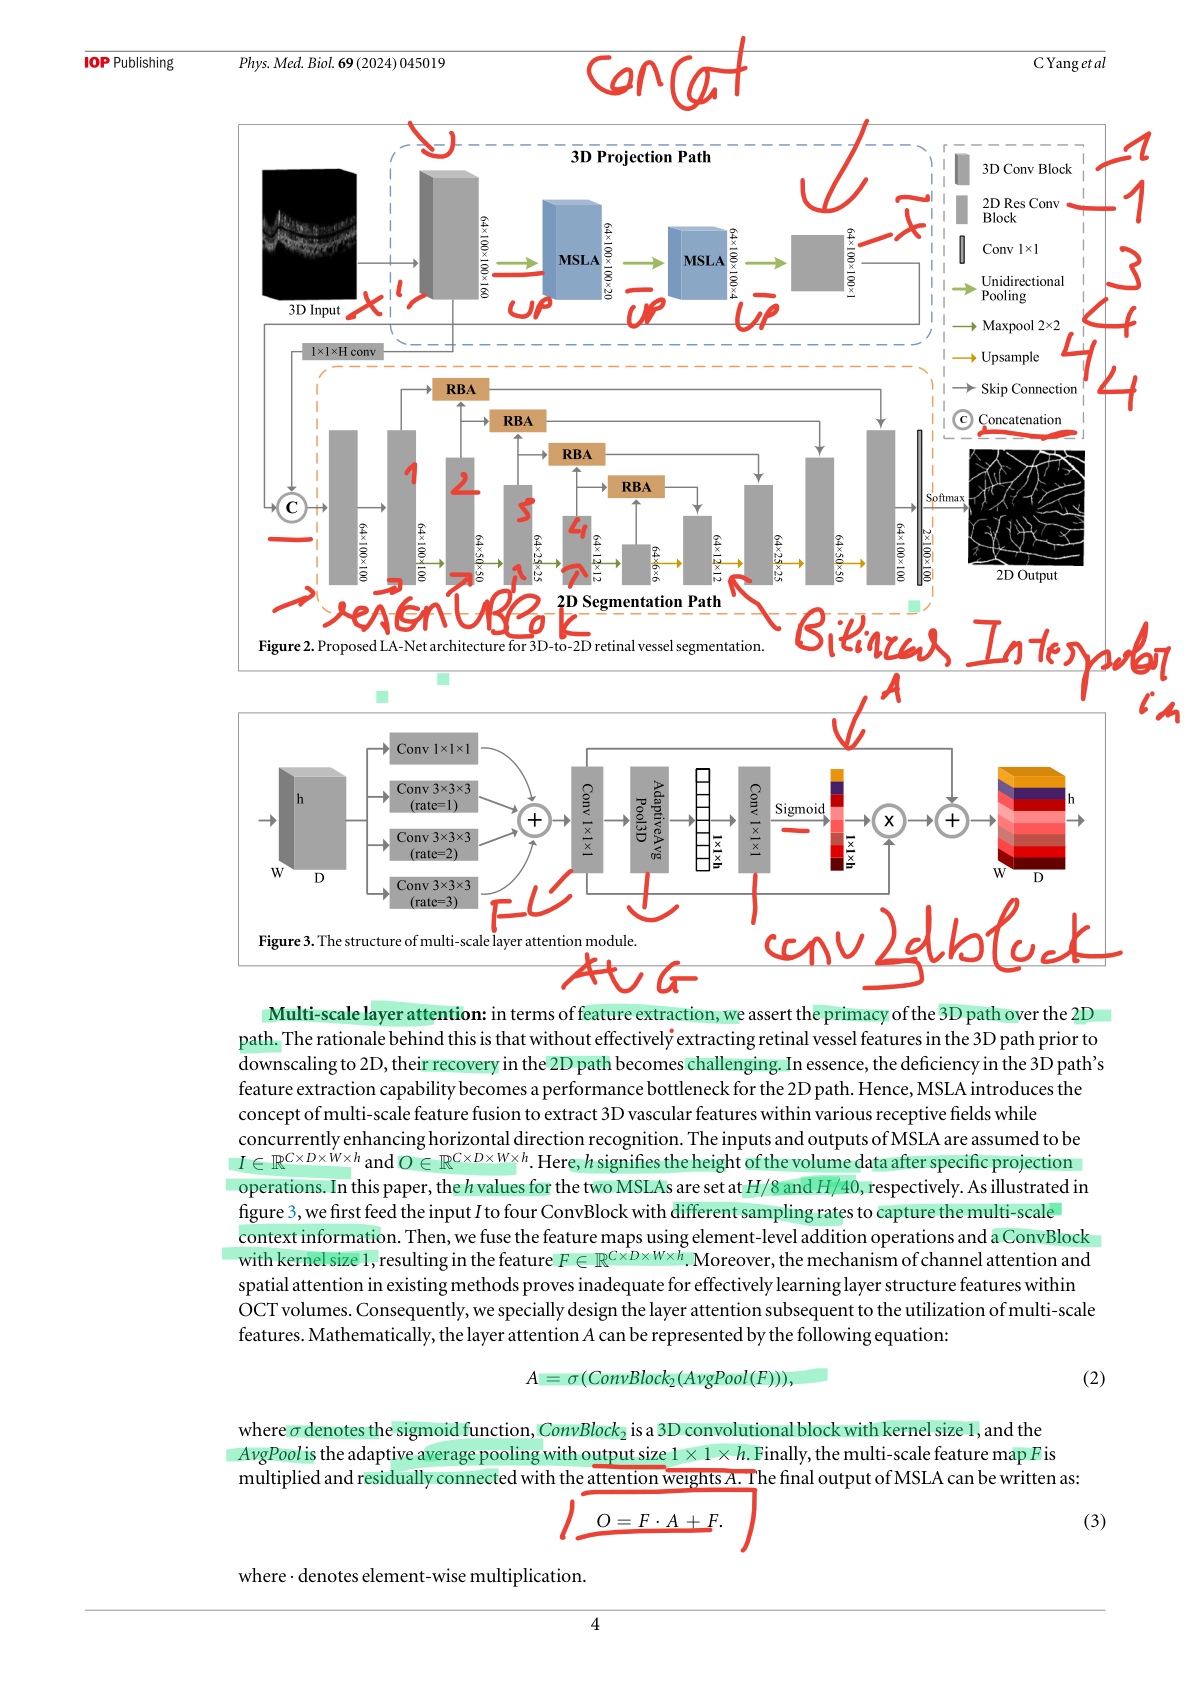

Page 6


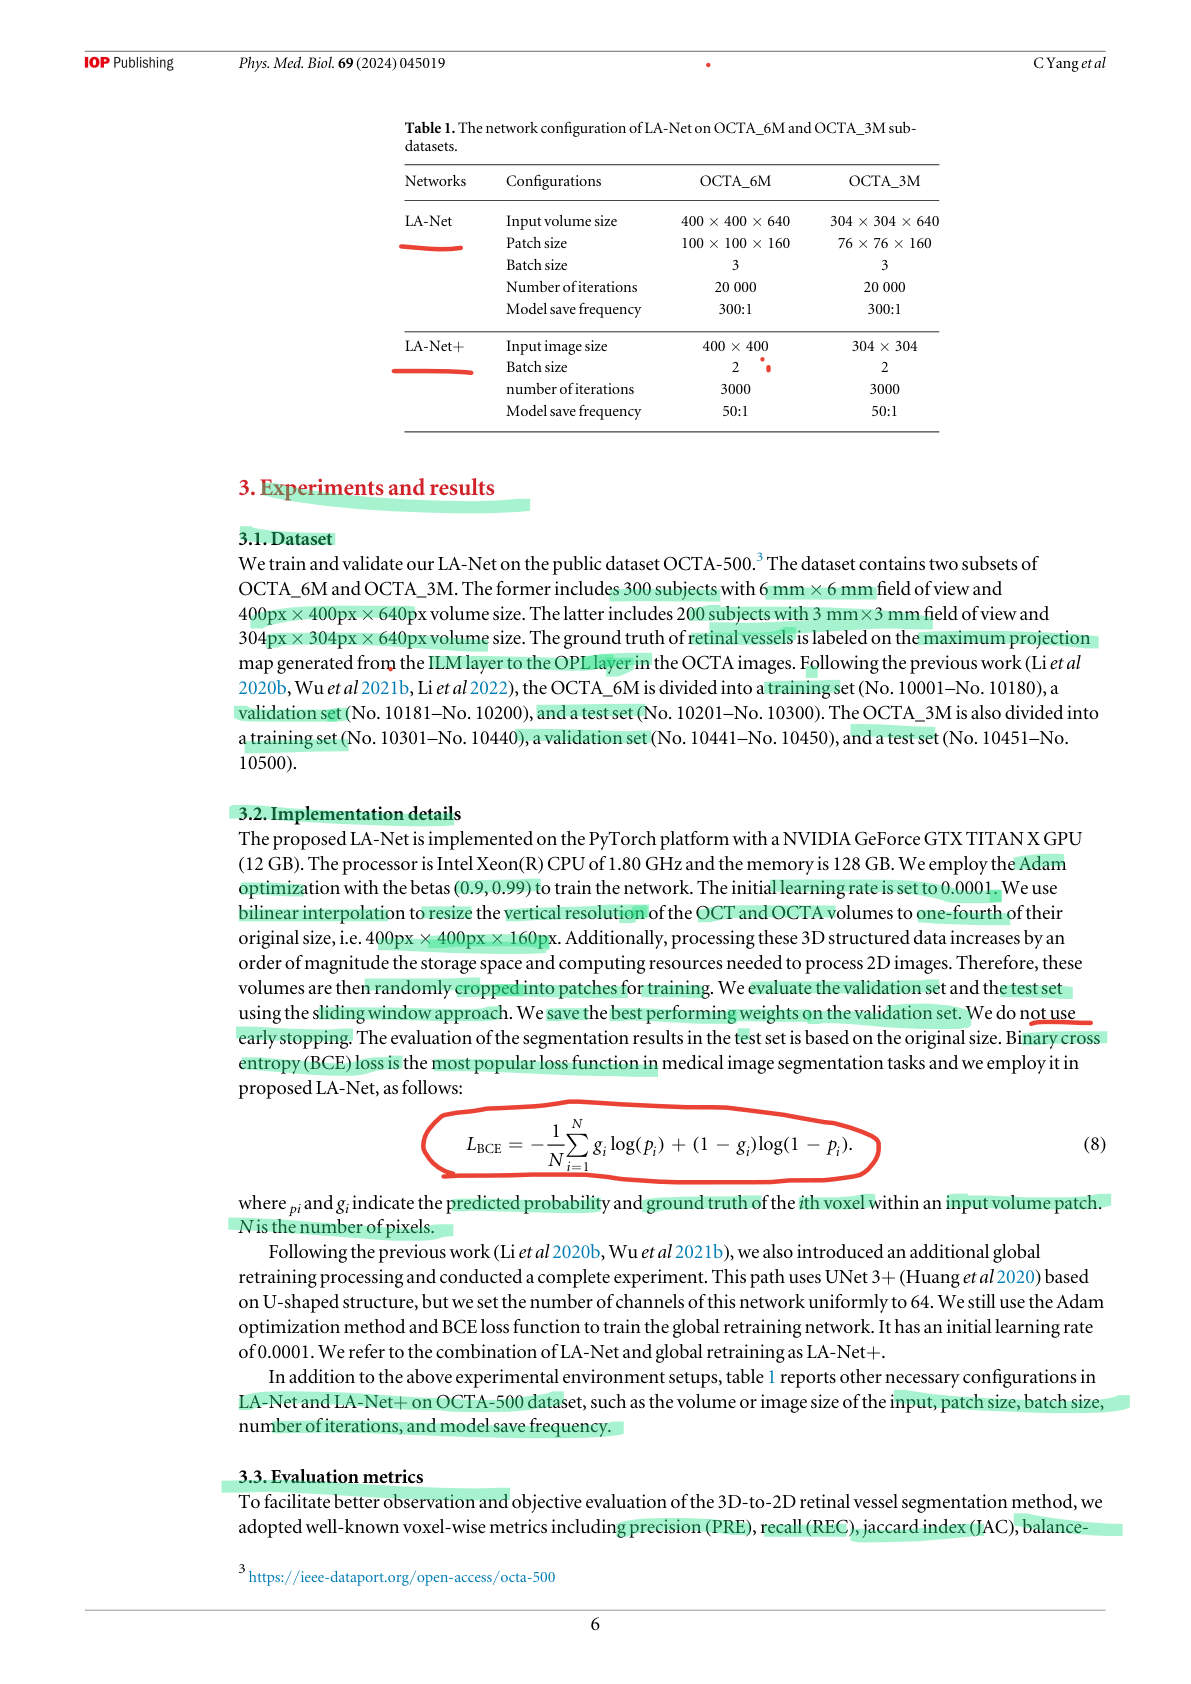

Page 7


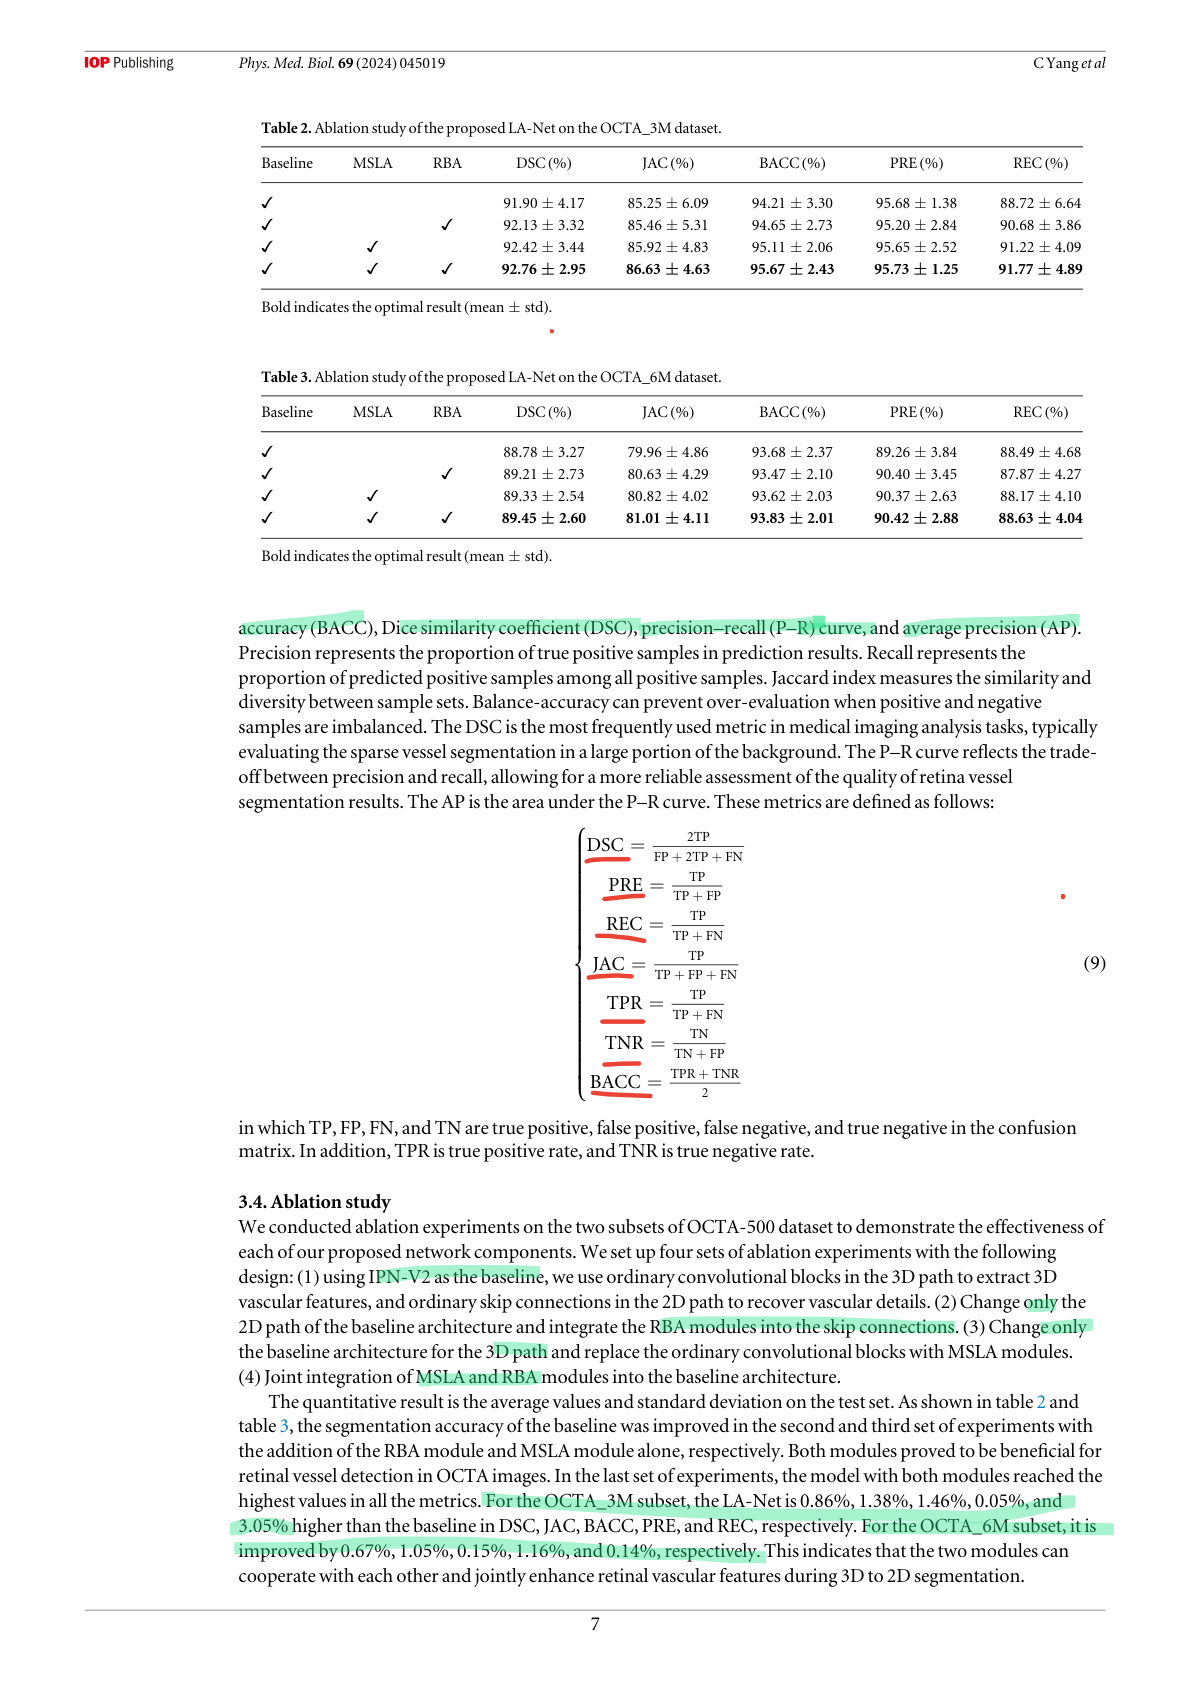

Page 9


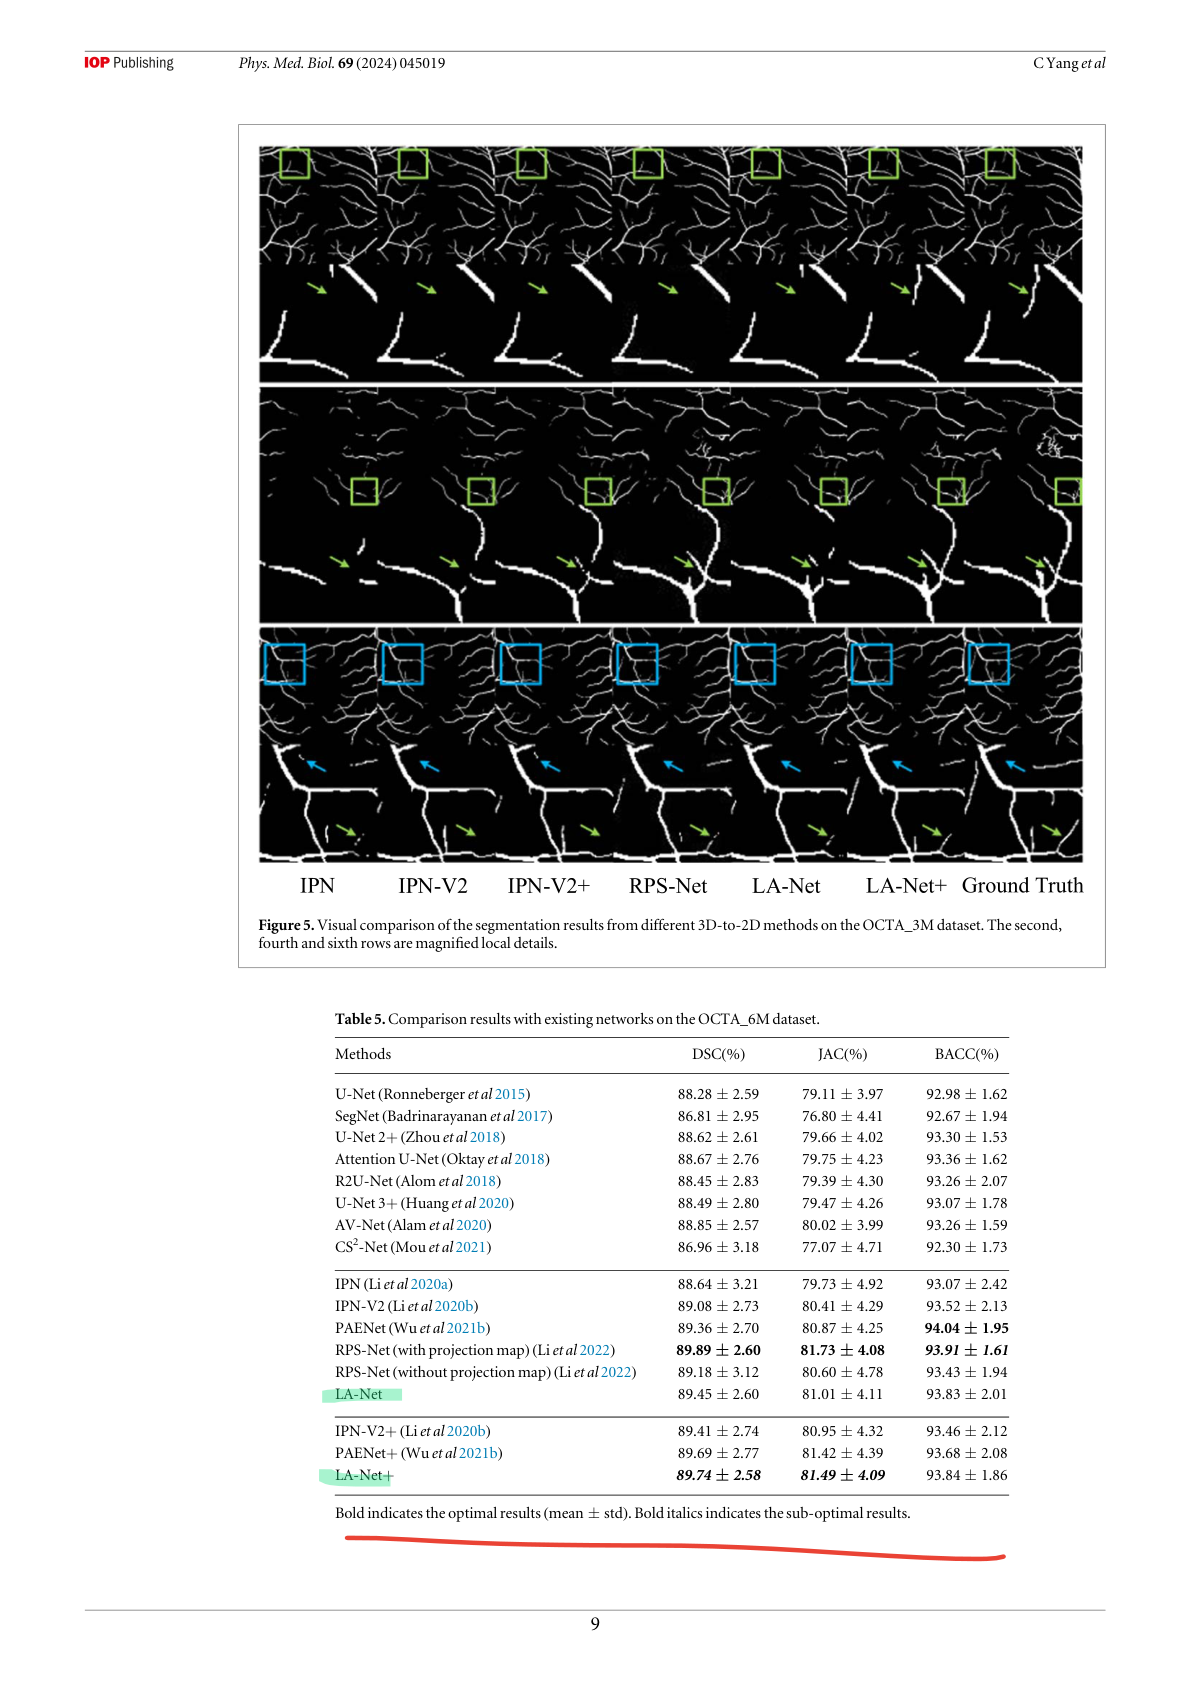

Page 13


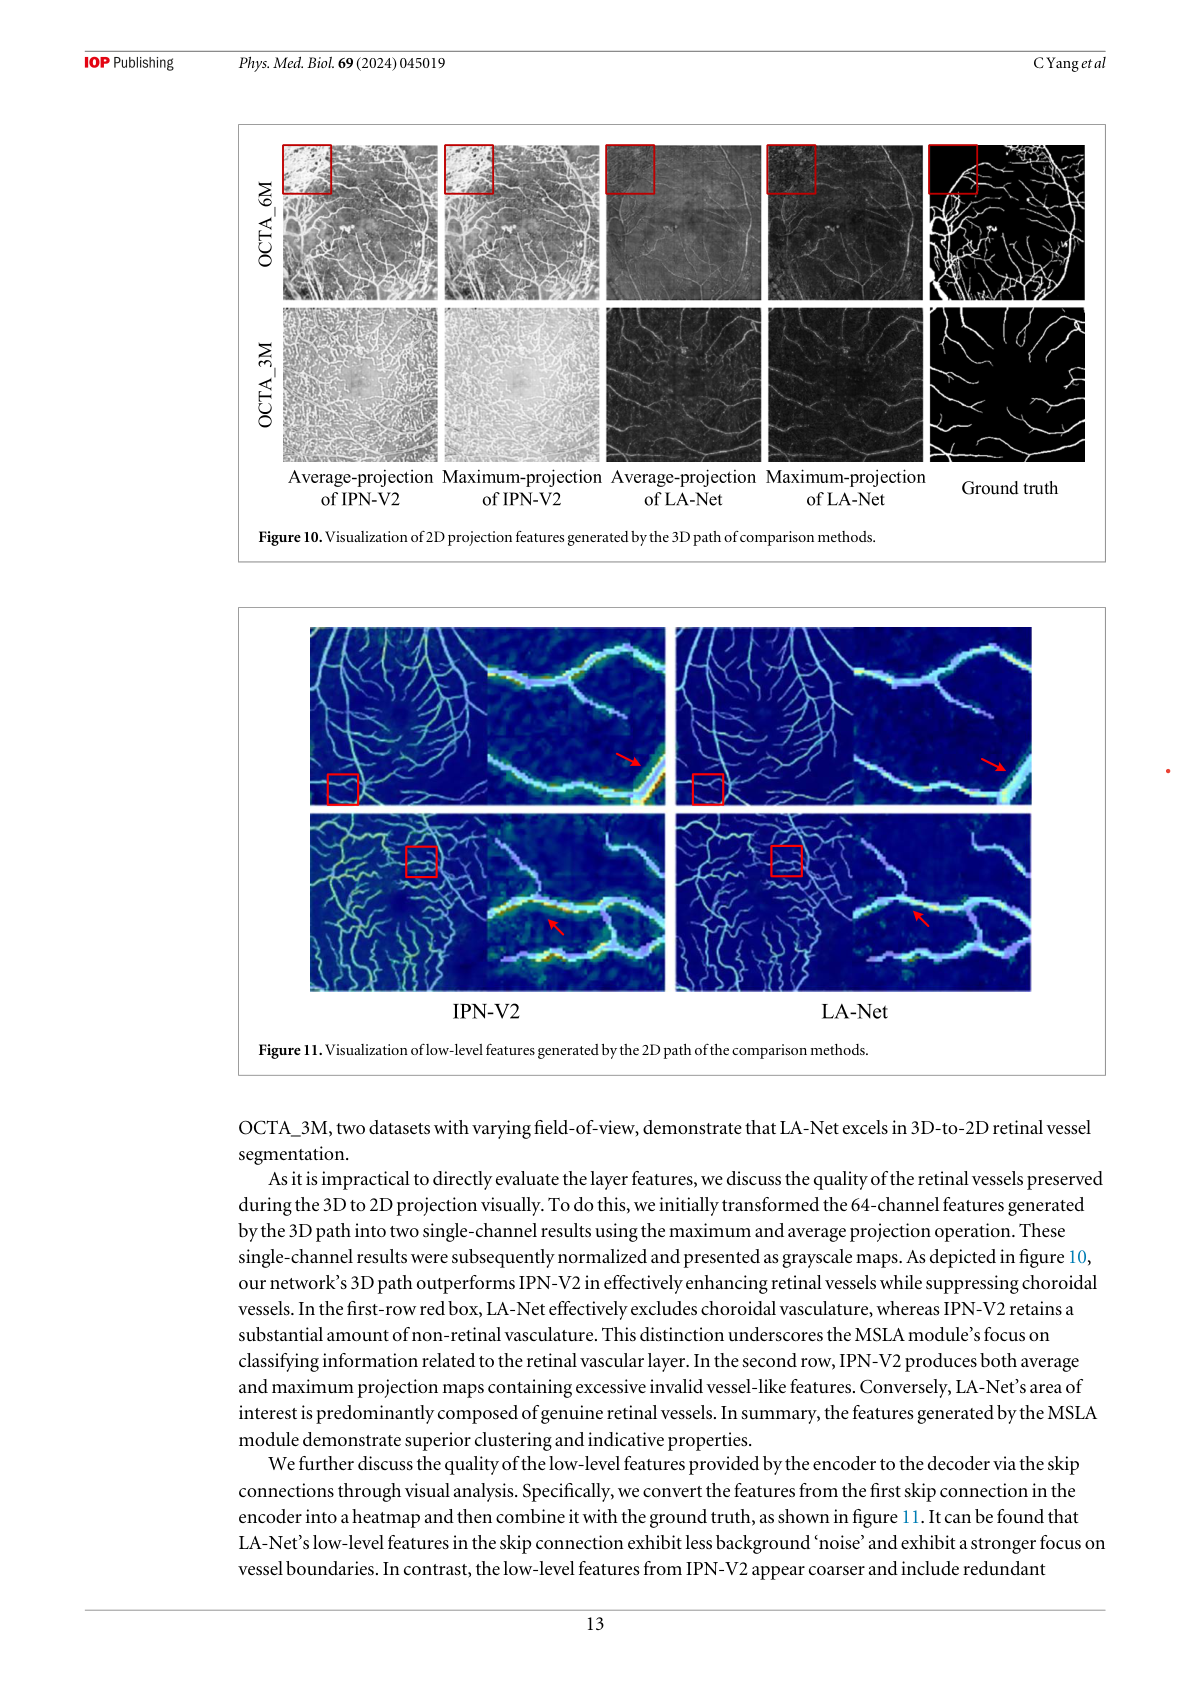


❓ Question (Enter để thoát): 


In [1]:
# ==================================================
# FULL OPEN-SOURCE MULTIMODAL RAG (PDF + OCR + IMAGE DISPLAY)
# Transformers version (NO llama.cpp)
# File: /content/tai_lieu_mau.pdf
# ==================================================

# -------- INSTALL --------
# !pip install pymupdf pytesseract pillow
# !pip install faiss-cpu
# !pip install sentence-transformers
# !pip install transformers accelerate torch

import os
import io
import fitz
import pytesseract
import faiss
import numpy as np
from PIL import Image
from IPython.display import display

import torch
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM

# -------- CONFIG --------
PDF_PATH = "/content/tai_lieu_mau.pdf"
IMAGE_DIR = "/content/page_images"
TOP_K = 5

MODEL_NAME = "Qwen/Qwen2.5-7B-Instruct"
# nhẹ hơn:
# MODEL_NAME = "Qwen/Qwen2.5-3B-Instruct"
# MODEL_NAME = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

os.makedirs(IMAGE_DIR, exist_ok=True)

# -------- LOAD MODELS --------
print("🔹 Loading embedding model...")
embed_model = SentenceTransformer("all-MiniLM-L6-v2")

print("🔹 Loading LLM from HuggingFace...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16 if DEVICE == "cuda" else torch.float32,
    device_map="auto"
)
model.eval()

# -------- PDF EXTRACTION --------
def extract_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    chunks = []

    for page_id, page in enumerate(doc):
        # ---- TEXT ----
        text = page.get_text().strip()
        if text:
            chunks.append({
                "page": page_id,
                "content": text,
                "image": None
            })

        # ---- RENDER PAGE IMAGE (SAFE) ----
        mat = fitz.Matrix(2, 2)
        pix = page.get_pixmap(matrix=mat, colorspace=fitz.csRGB)

        img_path = f"{IMAGE_DIR}/page_{page_id}.png"
        pix.save(img_path)

        image = Image.open(img_path)

        # ---- OCR ----
        ocr_text = pytesseract.image_to_string(
            image,
            config="--psm 6"
        ).strip()

        if ocr_text:
            chunks.append({
                "page": page_id,
                "content": ocr_text,
                "image": img_path
            })

    return chunks

# -------- CHUNKING --------
def chunk_text(text, size=300):
    words = text.split()
    return [
        " ".join(words[i:i + size])
        for i in range(0, len(words), size)
    ]

# -------- BUILD INDEX --------
def build_index(chunks):
    texts, meta = [], []

    for c in chunks:
        for ch in chunk_text(c["content"]):
            texts.append(ch)
            meta.append({
                "page": c["page"],
                "text": ch,
                "image": c["image"]
            })

    embeddings = embed_model.encode(
        texts,
        convert_to_numpy=True,
        show_progress_bar=True
    )

    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    return index, meta

# -------- RETRIEVE --------
def retrieve(query, index, meta):
    q_emb = embed_model.encode([query])
    _, idxs = index.search(q_emb, TOP_K)
    return [meta[i] for i in idxs[0]]

# -------- GENERATE ANSWER --------
def generate_answer(query, contexts):
    context_text = ""
    used_pages = set()

    for c in contexts:
        context_text += f"- (Page {c['page']}) {c['text']}\n"
        used_pages.add(c["page"])

    prompt = f"""
Bạn là trợ lý AI.
CHỈ sử dụng thông tin trong context để trả lời.
Nếu không tìm thấy, hãy nói rõ "Không tìm thấy trong tài liệu".

Context:
{context_text}

Question:
{query}

Answer:
"""

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        output_ids = model.generate(
            **inputs,
            max_new_tokens=512,
            do_sample=False
        )

    answer = tokenizer.decode(
        output_ids[0][inputs["input_ids"].shape[-1]:],
        skip_special_tokens=True
    )

    return answer.strip(), used_pages

# -------- RUN PIPELINE --------
if __name__ == "__main__":
    print("📄 Extracting PDF...")
    raw_chunks = extract_pdf(PDF_PATH)

    print("📦 Building FAISS index...")
    index, meta = build_index(raw_chunks)

    print("✅ Multimodal RAG ready (TEXT + IMAGE)")

    while True:
        q = input("\n❓ Question (Enter để thoát): ")
        if not q:
            break

        ctxs = retrieve(q, index, meta)
        ans, pages = generate_answer(q, ctxs)

        print("\n🤖 Answer:\n", ans)

        print("\n🖼️ Related pages:")
        for p in sorted(pages):
            img_path = f"{IMAGE_DIR}/page_{p}.png"
            if os.path.exists(img_path):
                print(f"Page {p}")
                display(Image.open(img_path))


In [ ]:
# ==================================================
# FULL OPEN-SOURCE MULTIMODAL RAG (PDF + OCR)
# Transformers version (NO llama.cpp)
# File: /content/tai_lieu_mau.pdf
# ==================================================

# -------- INSTALL --------
# !pip install pymupdf pytesseract pillow
# !pip install faiss-cpu
# !pip install sentence-transformers
# !pip install transformers accelerate torch

import fitz
import pytesseract
import faiss
import numpy as np
from PIL import Image

import torch
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM

# -------- CONFIG --------
PDF_PATH = "/content/tai_lieu_mau.pdf"
TOP_K = 5

MODEL_NAME = "Qwen/Qwen2.5-7B-Instruct"
# đổi nếu máy yếu:
# "Qwen/Qwen2.5-3B-Instruct"
# "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# -------- LOAD MODELS --------
print("🔹 Loading embedding model...")
embed_model = SentenceTransformer("all-MiniLM-L6-v2")

print("🔹 Loading LLM from HuggingFace...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16 if DEVICE == "cuda" else torch.float32,
    device_map="auto"
)
model.eval()

# -------- PDF EXTRACTION --------
import io
import fitz
from PIL import Image

def extract_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    chunks = []

    for page_id, page in enumerate(doc):
        # ---- TEXT ----
        text = page.get_text().strip()
        if text:
            chunks.append({
                "page": page_id,
                "content": text
            })

        # ---- IMAGE OCR (SAFE WAY) ----
        image_list = page.get_images(full=True)
        if not image_list:
            continue

        # Render whole page as image (safe colorspace)
        mat = fitz.Matrix(2, 2)  # tăng resolution cho OCR
        pix = page.get_pixmap(matrix=mat, colorspace=fitz.csRGB)

        img_bytes = pix.tobytes("png")
        image = Image.open(io.BytesIO(img_bytes))

        ocr_text = pytesseract.image_to_string(
            image,
            config="--psm 6"
        ).strip()

        if ocr_text:
            chunks.append({
                "page": page_id,
                "content": ocr_text
            })

    return chunks


# -------- CHUNKING --------
def chunk_text(text, size=300):
    words = text.split()
    return [
        " ".join(words[i:i + size])
        for i in range(0, len(words), size)
    ]

# -------- BUILD INDEX --------
def build_index(chunks):
    texts, meta = [], []

    for c in chunks:
        for ch in chunk_text(c["content"]):
            texts.append(ch)
            meta.append({
                "page": c["page"],
                "text": ch
            })

    embeddings = embed_model.encode(
        texts,
        convert_to_numpy=True,
        show_progress_bar=True
    )

    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    return index, meta

# -------- RETRIEVE --------
def retrieve(query, index, meta):
    q_emb = embed_model.encode([query])
    _, idxs = index.search(q_emb, TOP_K)
    return [meta[i] for i in idxs[0]]

# -------- GENERATE ANSWER --------
def generate_answer(query, contexts):
    context_text = ""
    for c in contexts:
        context_text += f"- (Page {c['page']}) {c['text']}\n"

    prompt = f"""
Bạn là trợ lý AI.
CHỈ sử dụng thông tin trong context để trả lời.
Nếu không tìm thấy, hãy nói rõ "Không tìm thấy trong tài liệu".

Context:
{context_text}

Question:
{query}

Answer:
"""

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        output_ids = model.generate(
            **inputs,
            max_new_tokens=512,
            temperature=0.1,
            do_sample=False
        )

    answer = tokenizer.decode(
        output_ids[0][inputs["input_ids"].shape[-1]:],
        skip_special_tokens=True
    )

    return answer.strip()

# -------- RUN PIPELINE --------
if __name__ == "__main__":
    print("📄 Extracting PDF...")
    raw_chunks = extract_pdf(PDF_PATH)

    print("📦 Building FAISS index...")
    index, meta = build_index(raw_chunks)

    print("✅ Multimodal RAG ready (Transformers, Open-Source)")

    while True:
        q = input("\n❓ Question (Enter để thoát): ")
        if not q:
            break
        ctxs = retrieve(q, index, meta)
        ans = generate_answer(q, ctxs)
        print("\n🤖 Answer:\n", ans)
